### Organize lightly-coupled (LC) model assimilation rate

In [1]:
import glob


LC_FBA_cyclicE_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "Ferredoxin_Plastoquinone_Reductase_p1" in line:
            LC_FBA_cyclicE_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])*2

In [2]:
LC_FBA_PSI_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "RXN490_3650_p1" in line:
            LC_FBA_PSI_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])

In [3]:
LC_FBA_PSII_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "PSII_RXN_p1" in line:
            LC_FBA_PSII_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])*4

In [4]:
import glob

LC_ODE_PSII_dict=dict()
for fname in glob.glob("LC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vz_2" in line:
            LC_ODE_PSII_dict[int(fname.split("_")[3].split(".")[0])] = float(line.replace(" ","").split("vz_2")[1])



In [5]:
import glob

LC_FBA_ATP_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "Plastidial_ATP_Synthase_p1" in line:
            LC_FBA_ATP_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])*3

In [6]:
import glob

LC_FBA_NADPH_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p1" in line:
            LC_FBA_NADPH_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])

In [7]:
import glob

LC_FBA_Photon_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "Photon_tx1" in line:
            LC_FBA_Photon_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])

### Organize tightly-coupled (TC) model assimilation rate

In [8]:
import glob

TC_ODE_cyclicE_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vbfn2" in line:
            TC_ODE_cyclicE_dict[int(fname.split("_")[3].split(".")[0])] = float(line.replace(" ","").split("vbfn2")[1])



In [9]:
import glob

TC_ODE_PSI_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "Vbf16" in line:
            TC_ODE_PSI_dict[int(fname.split("_")[3].split(".")[0])] = float(line.replace(" ","").split("Vbf16")[1])



In [10]:
import glob

TC_ODE_PSII_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vz_2" in line:
            TC_ODE_PSII_dict[int(fname.split("_")[3].split(".")[0])] = float(line.replace(" ","").split("vz_2")[1])



In [11]:
import glob

TC_ODE_ATP_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "Vbf11" in line:
            TC_ODE_ATP_dict[int(fname.split("_")[3].split(".")[0])] = float(line.replace(" ","").split("Vbf11")[1])



In [12]:
import glob

TC_ODE_NADPH_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vbfn2" in line:
            TC_ODE_NADPH_dict[int(fname.split("_")[3].split(".")[0])] = float(line.replace(" ","").split("vbfn2")[1])



In [13]:
import glob

TC_ODE_Photon_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "" in line:
            TC_ODE_Photon_dict[int(fname.split("_")[3].split(".")[0])] = float(line.replace(" ","").split("vbfn2")[1])



IndexError: list index out of range

### Plotting

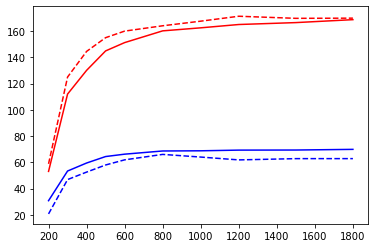

In [15]:
import matplotlib.pyplot as plt

xlist1 = sorted(LC_FBA_cyclicE_dict.keys())
ylist1_c = list()
ylist1_n = list()
for x in xlist1:
    ylist1_c.append(LC_FBA_PSI_dict[x]-LC_FBA_PSII_dict[x])
    ylist1_n.append(LC_FBA_PSII_dict[x])

xlist2 = sorted(TC_ODE_PSII_dict.keys())
ylist2_c = list()
ylist2_n = list()
for x in xlist2[1:]:
    ylist2_c.append(TC_ODE_PSI_dict[x]-TC_ODE_PSII_dict[x])
    ylist2_n.append(TC_ODE_PSII_dict[x])

plt.plot(xlist1,ylist1_c,"b-")
plt.plot(xlist1,ylist1_n,"r-")
plt.plot(xlist2[1:],ylist2_c,"b--")
plt.plot(xlist2[1:],ylist2_n,"r--")
plt.show()

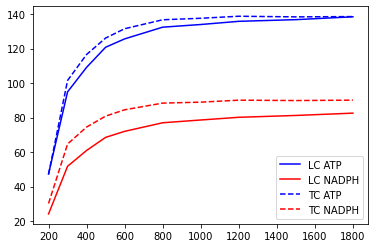

In [16]:
import matplotlib.pyplot as plt

xlist1 = sorted(LC_FBA_cyclicE_dict.keys())
ylist1_A = list()
ylist1_N = list()
for x in xlist1:
    ylist1_A.append(LC_FBA_ATP_dict[x])
    ylist1_N.append(LC_FBA_NADPH_dict[x])

xlist2 = sorted(TC_ODE_PSII_dict.keys())
ylist2_A = list()
ylist2_N = list()
for x in xlist2[1:]:
    ylist2_A.append(TC_ODE_ATP_dict[x])
    ylist2_N.append(TC_ODE_NADPH_dict[x])

plt.plot(xlist1,ylist1_A,"b-",label="LC ATP")
plt.plot(xlist1,ylist1_N,"r-",label="LC NADPH")
plt.plot(xlist2[1:],ylist2_A,"b--",label="TC ATP")
plt.plot(xlist2[1:],ylist2_N,"r--",label="TC NADPH")
plt.legend()
plt.show()

In [20]:
for x in xlist1:
    print(str(LC_FBA_cyclicE_dict[x])+"\t"+str(TC_ODE_cyclicE_dict[x]))

30.50954841418557	30.17873
51.778571794523096	64.64118
57.17291232624234	74.45226
61.510419999384304	80.79933
62.960801535760645	84.47372
64.86917593797283	88.36717
64.83225108268871	89.71902
65.14209073074005	90.00573
64.98618417600534	89.91661
65.32427275887261	90.52281
